Detecting languages for premise: 100%|██████████| 5195/5195 [00:08<00:00, 584.87it/s]


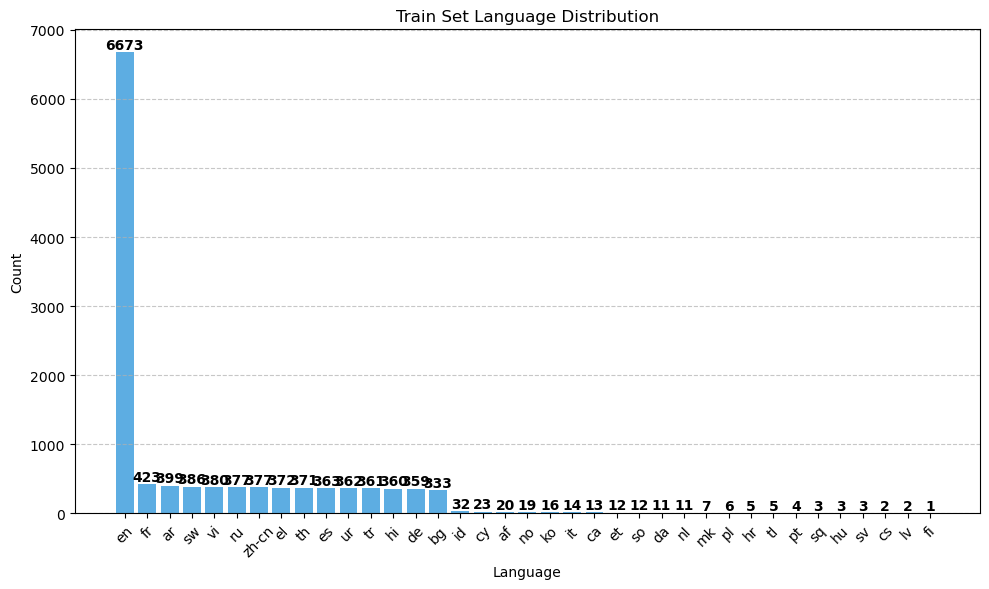

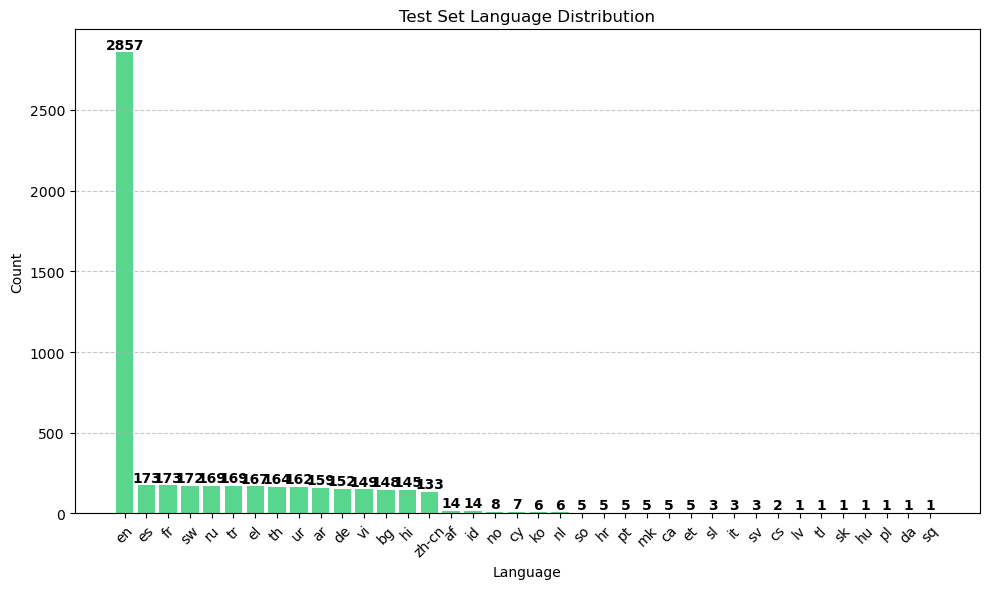

In [3]:
from langdetect import detect
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

# ✅ 加载数据
train_df = pd.read_csv("D:\\AIClass_demo\\AIClass_demo0\\single_work\\dataSet\\train.csv")
test_df = pd.read_csv("D:\\AIClass_demo\\AIClass_demo0\\single_work\\dataSet\\test.csv")

# ✅ 检测语言函数
def detect_languages(data, text_column):
    lang_counts = Counter()
    failed = 0
    for text in tqdm(data[text_column], desc=f"Detecting languages for {text_column}"):
        try:
            lang = detect(str(text))
        except:
            lang = "unknown"
            failed += 1
        lang_counts[lang] += 1
    return lang_counts, failed

# ✅ 统计语言分布
train_langs, train_failed = detect_languages(train_df, "premise")
test_langs, test_failed = detect_languages(test_df, "premise")

# ✅ 转为 DataFrame
train_lang_df = pd.DataFrame(train_langs.items(), columns=["language", "count"])
test_lang_df = pd.DataFrame(test_langs.items(), columns=["language", "count"])

# ✅ 柱状图绘制函数（带标签）
def plot_lang_distribution(df, title, color):
    df = df.sort_values(by="count", ascending=False)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df["language"], df["count"], color=color)
    
    # 添加数量标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.title(title)
    plt.xlabel("Language")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ✅ 绘图
plot_lang_distribution(train_lang_df, "Train Set Language Distribution", color="#5DADE2")
plot_lang_distribution(test_lang_df, "Test Set Language Distribution", color="#58D68D")
